Notebook for quick dataset-related hypothesis testing 

In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import sys
sys.path.append('/Users/ivan_zorin/Documents/DEV/code/ntl/')
from data.data import get_dataset

In [7]:
datapath = '/Users/ivan_zorin/Documents/DEV/data/sgcc/data.csv'
dataset = get_dataset(datapath)

In [13]:
data = dataset.copy().drop('FLAG', axis=1)

In [27]:
days = data.shape[1]
nan_ratio = data.isna().sum(axis=1) / days

In [47]:
nan_ratio = nan_ratio[nan_ratio < 0.7]

In [54]:
data.loc[nan_ratio.index.to_list()].shape

(32854, 1034)

<Axes: ylabel='Count'>

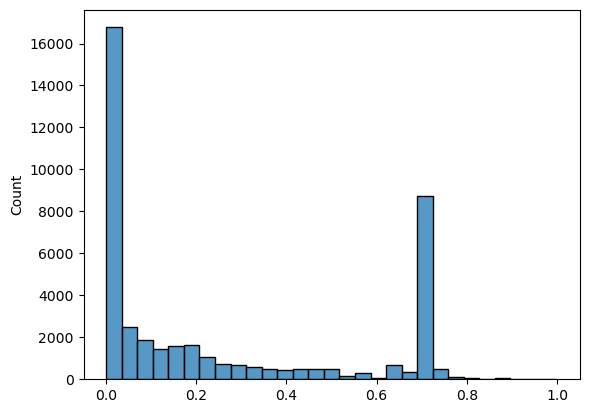

In [30]:
sns.histplot(nan_ratio)

In [38]:
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
values = np.quantile(nan_ratio.to_numpy(), quantiles)
for quant, val in zip(quantiles, values):
    print(quant, ':', val)

0.05 : 0.0029013539651837525
0.25 : 0.012572533849129593
0.5 : 0.10638297872340426
0.75 : 0.620164410058027
0.95 : 0.7108317214700194
